# Preprocessing

In [29]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator, PC, HillClimbSearch, ExhaustiveSearch

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(f'data{os.sep}heart.csv')
data = df.copy()

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Preprocessing
qua ho fatto un po' di roba a cazzo di cane giusto per avere dei labels


In [5]:
df["Age"] = pd.qcut(x=data["Age"], q=4, labels=["Young adults", "middleage", "almost old", "old"])
df["RestingBP"] = pd.qcut(x=data["RestingBP"], q=3, labels=["low", "medium", "high"])
df["Cholesterol"] = pd.qcut(x=data["Cholesterol"], q=3, labels=["low", "medium", "high"])
df["MaxHR"] = pd.qcut(x=data["MaxHR"], q=3, labels=["low", "medium", "high"])
df["Oldpeak"] = pd.qcut(x=data["Oldpeak"], q=3, labels=["low", "medium", "high"])

In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,Young adults,M,ATA,medium,high,0,Normal,high,N,low,Up,0
1,middleage,F,NAP,high,low,0,Normal,high,N,medium,Flat,1
2,Young adults,M,ATA,medium,high,0,ST,low,N,low,Up,0
3,middleage,F,ASY,medium,medium,0,Normal,low,Y,high,Flat,1
4,middleage,M,NAP,high,low,0,Normal,low,N,low,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,Young adults,M,TA,low,high,0,Normal,medium,N,medium,Flat,1
914,old,M,ASY,high,low,1,Normal,medium,N,high,Flat,1
915,almost old,M,ASY,medium,low,0,Normal,low,Y,medium,Flat,1
916,almost old,F,ATA,medium,medium,0,LVH,high,N,low,Flat,1


<Axes: >

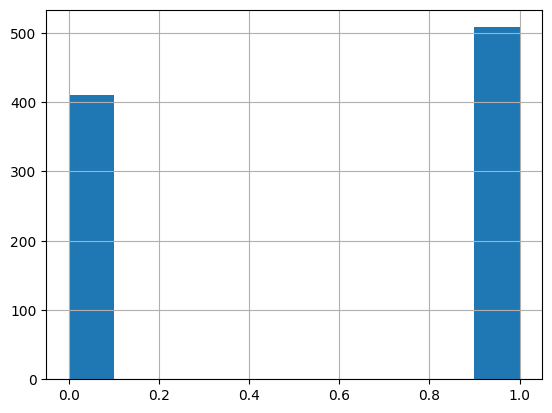

In [8]:
df["HeartDisease"].hist()

# Maximum Likelihood Estimator

## Creating train e test

In [10]:
Y = df["HeartDisease"]
X = df.drop("HeartDisease", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

## Creating a naive bayes network

In [11]:
columns = list(df.columns)
network = [("HeartDisease", x) for x in columns[:-1]]
nb_model = BayesianNetwork(network)

## Creating the estimator on the train set and applying its result to our network

In [12]:
estimator = MaximumLikelihoodEstimator(nb_model, xtrain.join(ytrain))

In [13]:
for _ in estimator.get_parameters():
    nb_model.add_cpds(_)

/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and w

## Make a prediction based on the CPDS given

In [14]:
ypred = nb_model.predict(xtest)

  0%|          | 0/225 [00:00<?, ?it/s]

100%|██████████| 225/225 [00:00<00:00, 878.96it/s]


In [15]:
accuracy_score(ypred, ytest)

0.8869565217391304

In [16]:
roc_auc_score(ytest, ypred, average="weighted")

0.8872248695257545

# Bayesian estimator

In [18]:
nb_model = BayesianNetwork(network)

In [19]:
estimator = BayesianEstimator(nb_model, xtrain.join(ytrain))

In [20]:
for _ in estimator.get_parameters():
    nb_model.add_cpds(_)

/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and w

In [21]:
ypred = nb_model.predict(xtest)

100%|██████████| 225/225 [00:00<00:00, 1144.94it/s]


In [22]:
accuracy_score(ypred, ytest)

0.8869565217391304

In [23]:
roc_auc_score(ytest, ypred, average="weighted")

0.8872248695257545

 # Learning from data

# PC

usando PC non funziona perchè crea due grafi separati, c'è da studiare perché

In [25]:
network = [("HeartDisease", x) for x in columns[:-1]]
nb_model = BayesianNetwork(network)

Y = df["HeartDisease"]
X = df.drop("HeartDisease", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [26]:
est = PC(data=df)
estimated_model = est.estimate(variant="parallel", max_cond_vars=2)

Working for n conditional variables: 0:   0%|          | 0/2 [00:00<?, ?it/s]/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/CITests.py:539: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/CITests.py:539: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/sit

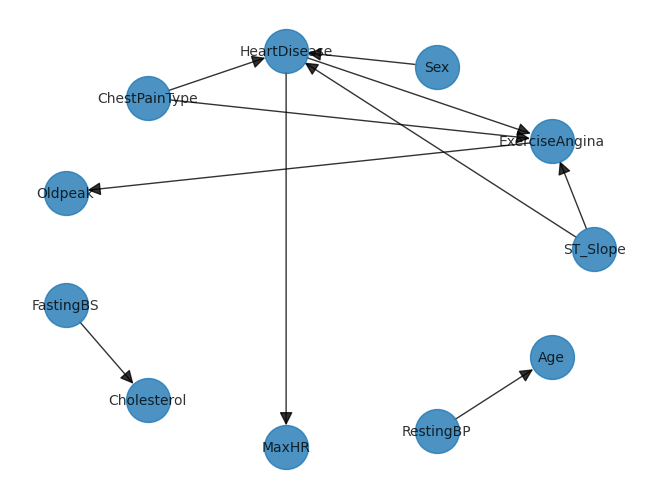

In [30]:
nx.draw_circular(estimated_model, with_labels=True, arrowsize=20, node_size=1000, font_size=10, alpha=0.8)
plt.show()

In [31]:
nb_model = BayesianNetwork(estimated_model)

In [32]:
estimator = MaximumLikelihoodEstimator(nb_model, xtrain.join(ytrain))

for _ in estimator.get_parameters():
    nb_model.add_cpds(_)


ypred = nb_model.predict(xtest)

/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and w

ValueError: Data has variables which are not in the model

# Hill Climbing

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 22/1000000 [00:02<26:49:48, 10.35it/s]


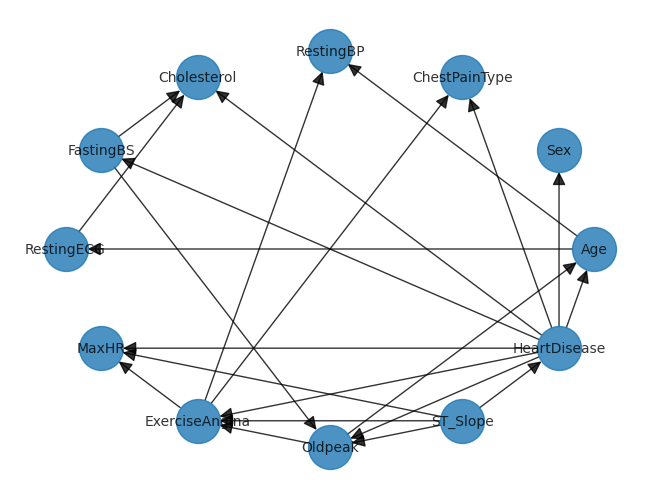

In [33]:
network = [("HeartDisease", x) for x in columns[:-1]]
nb_model = BayesianNetwork(network)

Y = df["HeartDisease"]
X = df.drop("HeartDisease", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

est = HillClimbSearch(data=df)
estimated_model = est.estimate()

nx.draw_circular(estimated_model, with_labels=True, arrowsize=20, node_size=1000, font_size=10, alpha=0.8)
plt.show()

In [34]:
nb_model = BayesianNetwork(estimated_model)

In [35]:
estimator = MaximumLikelihoodEstimator(nb_model, xtrain.join(ytrain))

for _ in estimator.get_parameters():
    nb_model.add_cpds(_)


ypred = nb_model.predict(xtest)

/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/matteo/Documenti/VSCODE/BayesianClassifier/.venv/lib/python3.11/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and w

In [36]:
roc_auc_score(ytest, ypred)

0.8484443085391026